# Brief

We want to use public demographic data (average age and income) of London to cluster different boroughs together. This will allow us to understand better which parts of the city are similar or not (in terms of these 2 variables). 

We will do this using the **k-means** algorithm.

# Import libraries

Use this opportunity to have a first brief look at `sklearn` using the [documentation](https://scikit-learn.org/stable/).

In [21]:
# for loading and manipulating dataframes
import pandas as pd

# for various plotting functions
import matplotlib.pyplot as plt
import seaborn as sns

# to scale our data so that we can perform "sensible" clustering
from sklearn.preprocessing import scale

# to provide an implementation of the k-means algorithm
from sklearn.cluster import KMeans

# Load data

In [22]:
data = pd.read_csv("LDN_demographic_data.csv")

data.head()

,Borough,Mean age (2017),"Average income (£, 2015)"
0,Barking and Dagenham,32.9,33018
1,Barnet,37.3,30900
2,Bexley,39.0,29664
3,Brent,35.6,29987
4,Bromley,40.2,30444


# Explore & Transform

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Borough                   33 non-null     object 
 1   Mean age (2017)           33 non-null     float64
 2   Average income (£, 2015)  33 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 920.0+ bytes


In [24]:
# you can also check for missing values using e.g.
data.isna().sum()

Borough                     0
Mean age (2017)             0
Average income (£, 2015)    0
dtype: int64

There are no missing values, and the data types look correct - no cleaning to do! We still have some exploration and preprocessing to do however.

In [25]:
# check summary statistics (for numerical variables)
data.describe()

,Mean age (2017),"Average income (£, 2015)"
count,33.000000,33.000000
mean,36.375758,32586.969697
std,2.487849,5554.108240
min,31.400000,26230.000000
25%,35.000000,29664.000000
50%,36.200000,30900.000000
75%,37.700000,33717.000000
max,43.200000,54034.000000


We notice that age and income have quite different **scales**: age ranges from about 31-43, whereas income ranges from about 26000-54000. We will return to this shortly!

There is also some indication from the summary statistics that there might be some **outliers** due to their income values. We can see this more easily from a visualisation:

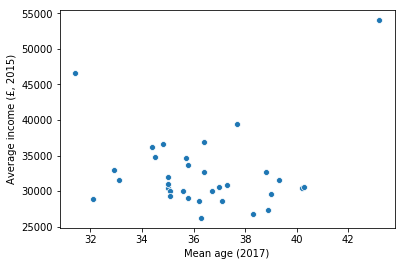

In [26]:
# create a scatterplot of the 2 variables
sns.scatterplot(x = data['Mean age (2017)'], y = data['Average income (£, 2015)'])

- The plot seems to show 2 outliers, and these are largely driven by their Income value.
- No particularly strong correlation between the variables - we can use clustering to break up the data into groups and find new structure for us!
- There are no overwhelmingly obvious clusters - there is some freedom in choosing k.

For clustering, it is important to **scale** our data so that all variables are of similar magnitude, and therefore contribute similarly to the clustering (e.g. when computing distances in k-means). If we didn't do this for the data above, our clusters would come out as horizontal "strips" because the horizontal distances between age values would be negligible when computing distances in k-means - the resulting clusters would be quite strange! We will demonstrate this with a visualisation below.

One way to scale is to use **standardization** - you subtract the mean and divide by the standard deviation (per column), resulting in a mean of 0 and a standard deviation of 1 for each column. (This is a common way of scaling in unsupervised learning, though other ways include **normalization** in which you subtract by the minimum value and divide by the range per column).

This is very easy to implement using [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) (which outputs the scaled data as a `np.array`):

In [27]:
data_scaled = scale(data[['Mean age (2017)', 'Average income (£, 2015)']])

data_scaled

array([[-1.41875497,  0.07880893],
       [ 0.37726266, -0.308443  ],
       [ 1.07117856, -0.53443139],
       [-0.31665325, -0.47537455],
       [ 1.56100155, -0.39181736],
       [ 0.00989541,  0.80138667],
       [ 2.78555902,  3.92134278],
       [ 0.25480691, -0.35817507],
       [-0.07174175, -0.71854975],
       [-0.03092317, -1.16229878],
       [-0.56156474, -0.38212692],
       [-1.33711781, -0.18667256],
       [-0.27583466,  0.37756704],
       [-0.52074616, -0.45983328],
       [ 0.78544848, -1.06356599],
       [ 1.60182013, -0.3649401 ],
       [ 0.00989541,  0.01719236],
       [-0.23501608,  0.20661304],
       [-0.6432019 ,  0.74818067],
       [ 1.1936343 , -0.19435178],
       [ 0.29562549, -0.7225722 ],
       [-0.76565765,  0.41413474],
       [-0.56156474, -0.30259217],
       [ 0.13235116, -0.46568411],
       [-1.74530363, -0.67667974],
       [-0.23501608, -0.63791797],
       [ 0.98954139,  0.01335275],
       [-0.80647623,  0.66754889],
       [ 1.03035997,

# Modelling with k-means

We can now run the k-means algorithm on our scaled data using the `KMeans()` function from `sklearn`. Note the use of `random_state` here - this just ensures that our data points get assigned the same cluster label each time we run the code block (the actual clusters themselves would be the same regardless of setting this argument due to the default `init = kmeans++` argument, but details of this are in the online practice).

In [28]:
# create a KMeans class object and choose the value of any parameters
model = KMeans(n_clusters = 6, random_state = 123)

# fit the model to the (scaled) data i.e. actually run the algorithm!
model.fit(data_scaled)

KMeans(n_clusters=6, random_state=123)

**Note**: this process of instantiating a model with parameter values and then running `.fit()` is found in numerous `sklearn` classes.

In [29]:
# we can access the clustering results via .labels_ after running .fit()
model.labels_

array([0, 1, 4, 1, 4, 3, 2, 1, 1, 1, 1, 0, 3, 1, 4, 4, 1, 3, 3, 4, 1, 3,
       1, 1, 0, 1, 4, 3, 4, 5, 1, 1, 3], dtype=int32)

**Note**: in sklearn, attributes that have an underscore such as `.labels_` are ones that can only be accessed after training a model with something like `.fit()`.

In [30]:
# add the cluster labels to a new column in our original dataframe
data['cluster'] = model.labels_

data.head()

,Borough,Mean age (2017),"Average income (£, 2015)",cluster
0,Barking and Dagenham,32.9,33018,0
1,Barnet,37.3,30900,1
2,Bexley,39.0,29664,4
3,Brent,35.6,29987,1
4,Bromley,40.2,30444,4


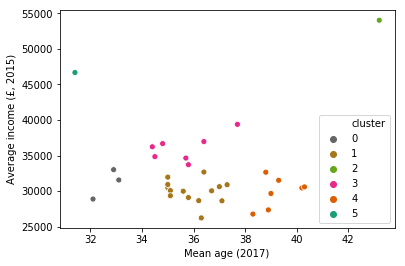

In [31]:
# visualise the clusters by replotting our scatterplot but now with cluster label as colour
sns.scatterplot(x = data['Mean age (2017)'], y = data['Average income (£, 2015)'],
               hue = data['cluster'],
               palette = 'Dark2_r',
               legend = 'full')

These looks like fairly sensible clusters (and we can see that the scaling has worked), and the algorithm has in this case identified the two outliers as being clusters by themselves (for our choice of k=6 of course).

**Note**: we can illustrate the effect of scaling by copying the code we used to cluster above, but this time performing it on the *unscaled* data. Notice how we do indeed get counter-intuitive horizontal strip clusters in this case, and not the sort of clusters we would expect to have found by eye-balling:

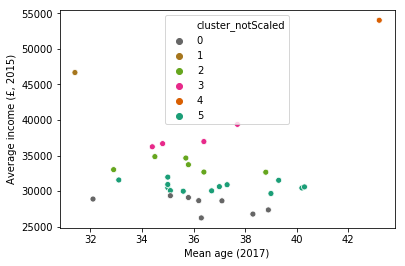

In [32]:
data_not_scaled = data[['Mean age (2017)', 'Average income (£, 2015)']]

model2 = KMeans(n_clusters = 6, random_state = 123)

model2.fit(data_not_scaled)

data['cluster_notScaled'] = model2.labels_

sns.scatterplot(x = data['Mean age (2017)'], y = data['Average income (£, 2015)'],
               hue = data['cluster_notScaled'],
               palette = 'Dark2_r',
               legend = 'full')

In more than 2 or 3 dimensions, it's harder to visualise your clusters. You will gain some experience of this in the online practice/hackathon. One particularly simple way to look at the cluster results is simply to subset by cluster label:

In [33]:
data[data['cluster'] == 0]

,Borough,Mean age (2017),"Average income (£, 2015)",cluster,cluster_notScaled
0,Barking and Dagenham,32.9,33018,0,2
11,Hackney,33.1,31566,0,5
24,Newham,32.1,28886,0,0


In [34]:
data[data['cluster'] == 2]

,Borough,Mean age (2017),"Average income (£, 2015)",cluster,cluster_notScaled
6,City of London,43.2,54034,2,4


**Domain knowledge** is key to interpreting the clusters. E.g. there are 2 outliers including the very high income City of London, which agrees with our wider knowledge. We always need domain knowledge for this - the clustering algorithms can never provide us with this insight themselves.

# Evaluate

We have produced our clustering, but are the results "good"? How can we quantify this? Did we pick the best value of k?

A common metric for evaluating clustering is called the **inertia** or "within-cluster sum-of-squares". This is simply the sum of the squared-deviations of each data point from its own cluster centroid. 

This gives a single number that quantifies how "good" the clustering is:

- Inertia large -> clustering is "loose" i.e. bad
- Inertia small -> clustering is "tight" i.e. good

The inertia is easy to calculate in `sklearn` using the `.inertia_` attribute (again only accessible after running `.fit()`:

In [35]:
model.inertia_

6.626725336602393

The raw inertia value is not always so easy to interpret, but it is most commonly used in helping determine the optimal value of k. The idea is to try different values of k, and choose k such that the inertia is lowest. The problem here however is that inertia *always* goes down as k increases - the inertia is 0 if you pick k = size of the dataset, but this clustering is trivial and useless!

In practice, people sometimes choose k with help of the **elbow method**. This starts off as above (i.e. compute the inertia for different values of k), but we don't just pick that k that gives the lowest inertia:

In [36]:
# create a list of different values of k to test
num_clusters = list(range(1,15))

# for each value of k, run KMeans, compute the inertia, and store the value in a list
# Note: we don't need to set the random_state here as we are only interested in the inertia value
inertias = [KMeans(n_clusters = i).fit(data_scaled).inertia_ for i in num_clusters]

Note the use of a **list comprehension** above, which in a single line of code stores the results of a for-loop into a list. If you don't like how compact this line of code is, you can do it with a full for loop in the usual way:

In [37]:
inertias_list = []

for i in num_clusters:
    inertias_list.append(KMeans(n_clusters = i).fit(data_scaled).inertia_) 

Let's look at the inertia values:

In [38]:
inertias

[66.00000000000001,
 42.140723396812234,
 24.19297766996453,
 16.29396876337271,
 10.755977295307963,
 6.626725336602393,
 5.232694692239634,
 3.872532309813158,
 3.158606431346842,
 2.3688390288135706,
 1.8982525749410624,
 1.5501402376028321,
 1.1752278422749638,
 0.9701401651476014]

Indeed these values are going down, but we notice that they start going down by less and less. Is there a balance to be struck between a low inertia value without unnecessarily large numbers of clusters?

Text(0.5, 1.0, 'Elbow test')

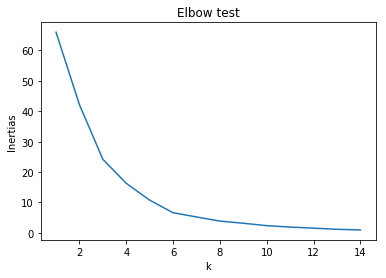

In [39]:
# plot inertia vs k and look for the kink or "elbow" in the plot to determine the optimal value of k
sns.lineplot(num_clusters, inertias)

# add a title and axis labels
plt.xlabel("k")
plt.ylabel("Inertias")
plt.title("Elbow test")

This somewhat validates our choice of k=6 earlier, because above this there is not much decrease in inertia for each increase in k - we're just adding complexity without much improvement in performance.

In practice, you would actually do this earlier on in the analysis, to determine what value of k to use when modelling.

Note however that **silhouette methods** provide a better metric and means of choosing k, as discussed in the online practice.